In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

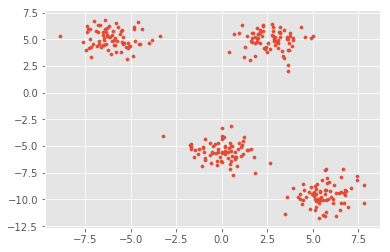

In [16]:
from sklearn.datasets.samples_generator import make_blobs
# make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None) 
# Returns
# X : array of shape [n_samples, n_features]
#     The generated samples.
# y : array of shape [n_samples]
#     The integer labels for cluster membership of each sample.
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=10)

In [9]:
import cv2 as cv
# criteria :
# cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached. 
# cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. 
# cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
plt.figure(figsize=(10,6))
# flags : This flag is used to specify how initial centers are taken. 
# Normally two flags are used for this : cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.
flags = cv.KMEANS_RANDOM_CENTERS

<Figure size 720x432 with 0 Axes>

In [15]:
import numpy as np
# attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. 
# The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
compactness, labels, centers = cv.kmeans(X.astype(np.float32), 4, None, criteria, 10, flags)
# Output parameters
#         compactness : It is the sum of squared distance from each point to their corresponding centers.
#         labels : This is the label array (same as ‘code’ in previous article) where each element marked ‘0’, ‘1’.....
#         centers : This is array of centers of clusters.

In [33]:
compactness

526.6774351084605

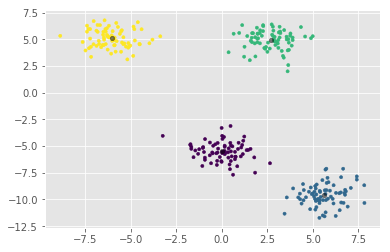

In [38]:
# in Numpy, list[:, N] means listing all N-th element in each list
plt.scatter(X[:,0], X[:, 1], c=labels[:,0], s=10)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=20, alpha=0.5);

In [39]:
# Understanding maximizing expectation method 
# 1. start from random cluster center
# 2. repeat till convergence
#     - expectation step : assign every data point to closest cluster center
#     - optimization step : calculate the mean of every points in cluster, update cluster center

In [ ]:
from sklearn.metricstrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=5):
#   1. initialize
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
#   2. continuous repeat